Preparing to read file: C:\Users\maggi\Downloads\ML\Weather\O-A0038-003.xml
Using grid size: width=67, height=120
Data preparation complete. Starting model training...
Model training and prediction complete!
--------------------------------------------------
Model Prediction Accuracy: 0.9830
--------------------------------------------------

>>> Generating Visualization Comparison Plot...


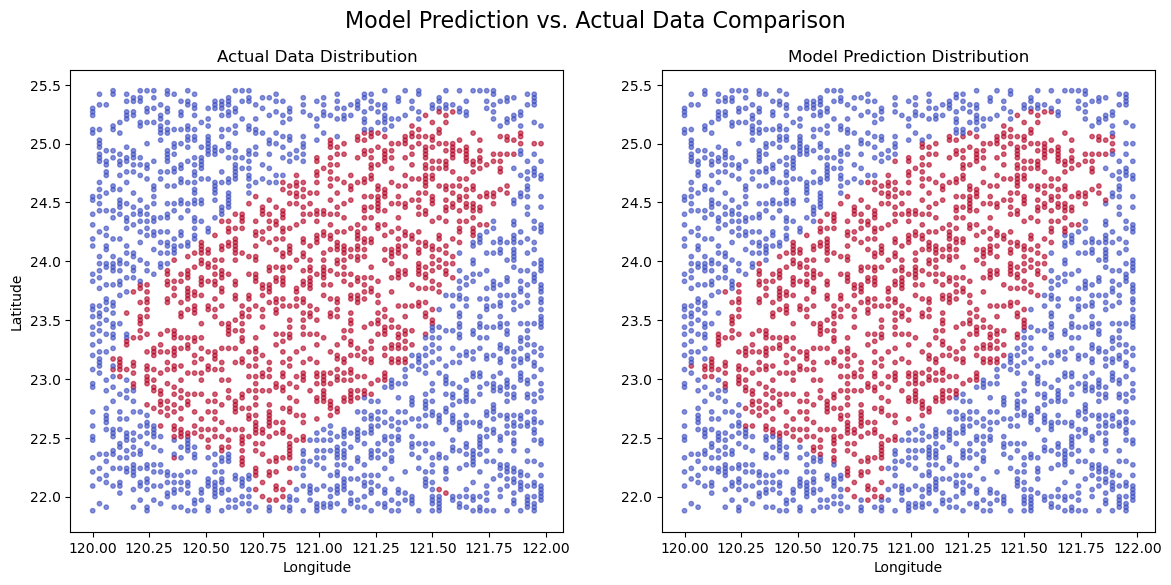


>>> Generating Quantitative Evaluation Metrics...


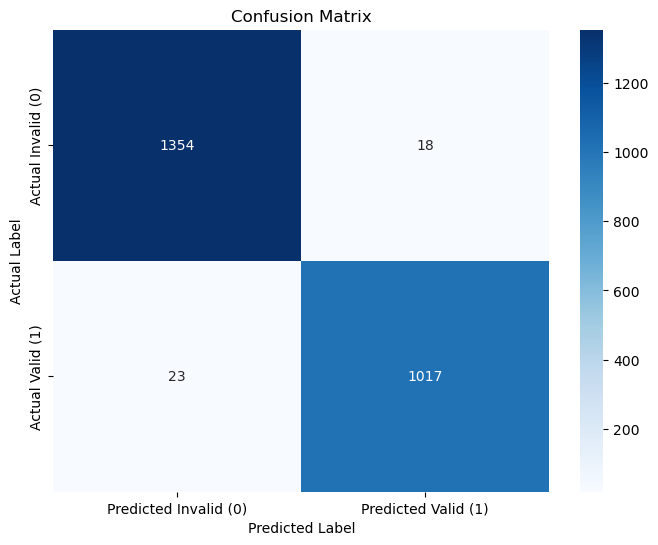


[Classification Report]:
                         precision    recall  f1-score   support

Invalid Point (label 0)       0.98      0.99      0.99      1372
  Valid Point (label 1)       0.98      0.98      0.98      1040

               accuracy                           0.98      2412
              macro avg       0.98      0.98      0.98      2412
           weighted avg       0.98      0.98      0.98      2412



In [8]:
import os
import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


folder_path = r'C:\Users\maggi\Downloads\ML\Weather'
file_name = 'O-A0038-003.xml' 
full_path = os.path.join(folder_path, file_name)
nx = 67
ny = 120
print(f"Preparing to read file: {full_path}")
print(f"Using grid size: width={nx}, height={ny}")



try:
    with open(full_path, 'r', encoding='utf-8-sig') as f:
        tree = ET.parse(f)
    root = tree.getroot()
    ns_uri = 'urn:cwa:gov:tw:cwacommon:0.1'
    content_text = None
    all_contents = root.findall(f'.//{{{ns_uri}}}Content')
    for content in all_contents:
        if content.text and "," in content.text:
            content_text = content.text
            break
    if content_text is None: raise ValueError("Could not find a <Content> block containing data.")
    
    clean_text = content_text.replace("\n", "").strip()
    repaired_text = re.sub(r'(E[+-]\d{2})(-)', r'\1,\2', clean_text)
    values_1d = np.array([float(x) for x in repaired_text.split(",") if x.strip()])
    
    if len(values_1d) != nx * ny: raise ValueError(f"Data size ({len(values_1d)}) does not match the specified dimensions ({ny}x{nx})!")
    
    value_grid = values_1d.reshape((ny, nx))
    lon_start, lat_start, step = 120.00, 21.88, 0.03
    lon_1d = np.arange(lon_start, lon_start + nx * step, step)[:nx]
    lat_1d = np.arange(lat_start, lat_start + ny * step, step)[:ny]
    lon_grid, lat_grid = np.meshgrid(lon_1d, lat_1d)
    label_grid = np.where(value_grid == -999.0, 0, 1)
    classification_df = pd.DataFrame({'longitude': lon_grid.flatten(),'latitude':  lat_grid.flatten(),'label':     label_grid.flatten()})
    
    print("Data preparation complete. Starting model training...")
    X = classification_df[['longitude', 'latitude']]
    y = classification_df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Model training and prediction complete!")
    print("-" * 50)
    print(f"Model Prediction Accuracy: {accuracy:.4f}")
    print("-" * 50)    
    print("\n>>> Generating Visualization Comparison Plot...")
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 
    
    axes[0].scatter(X_test['longitude'], X_test['latitude'], c=y_test, cmap='coolwarm', alpha=0.6, s=10)
    axes[0].set_title('Actual Data Distribution')
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')
    
    
    axes[1].scatter(X_test['longitude'], X_test['latitude'], c=y_pred, cmap='coolwarm', alpha=0.6, s=10)
    axes[1].set_title('Model Prediction Distribution')
    axes[1].set_xlabel('Longitude')
    
    plt.suptitle('Model Prediction vs. Actual Data Comparison', fontsize=16)
    plt.show()

    print("\n>>> Generating Quantitative Evaluation Metrics...")
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted Invalid (0)', 'Predicted Valid (1)'], 
                yticklabels=['Actual Invalid (0)', 'Actual Valid (1)'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')

    plt.ylabel('Actual Label')
    plt.show()

    print("\n[Classification Report]:")
    
    report = classification_report(y_test, y_pred, target_names=['Invalid Point (label 0)', 'Valid Point (label 1)'])
    print(report)

except Exception as e:
    print(f"\nAn error occurred during processing: {e}")


Preparing data for regression model...
Original data points: 8040
Filtered valid data points for training: 3495

Starting model training...
Model training and prediction complete!
--------------------------------------------------
Model Evaluation Metrics:
Mean Squared Error (MSE): 5.2383
R-squared (R²) Score: 0.8577
--------------------------------------------------

>>> Generating Visualization Comparison Plots...


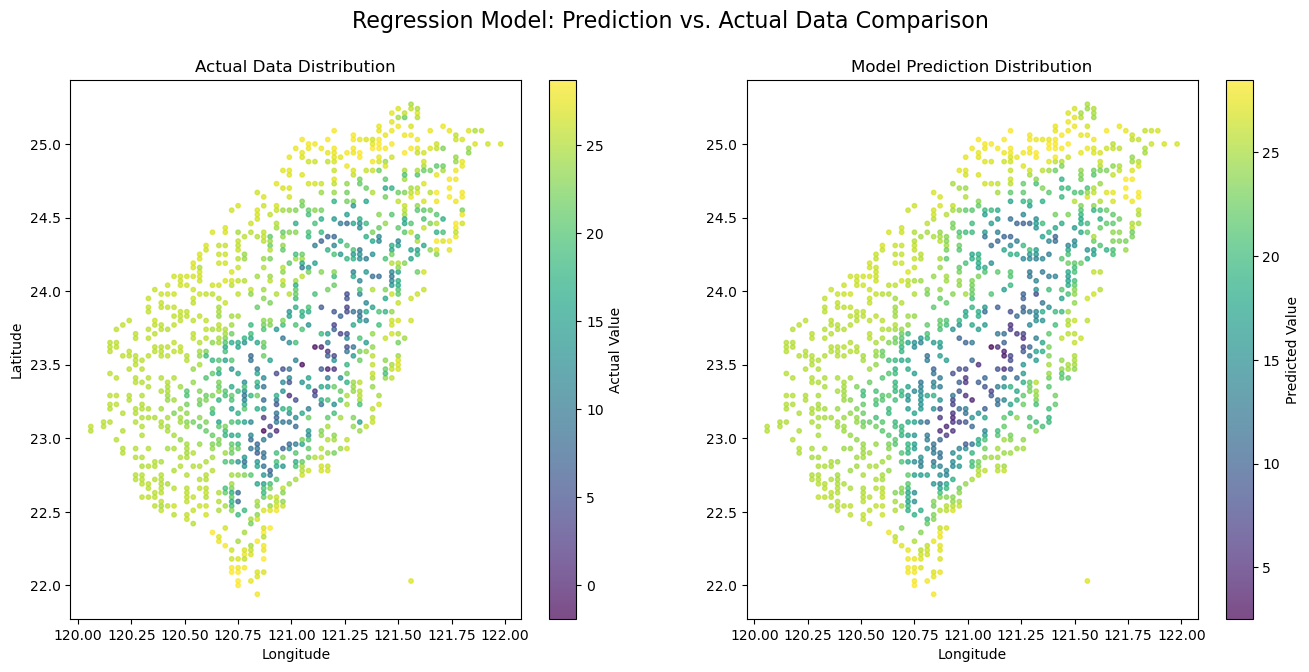

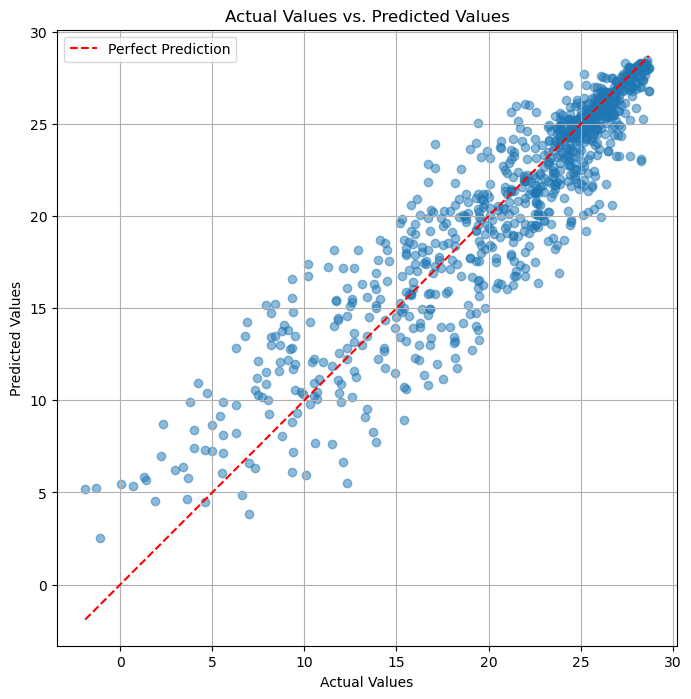

In [9]:
try:
    with open(full_path, 'r', encoding='utf-8-sig') as f:
        tree = ET.parse(f)
    root = tree.getroot()
    ns_uri = 'urn:cwa:gov:tw:cwacommon:0.1'
    content_text = None
    all_contents = root.findall(f'.//{{{ns_uri}}}Content')
    for content in all_contents:
        if content.text and "," in content.text:
            content_text = content.text
            break
    if content_text is None: raise ValueError("Could not find a <Content> block containing data.")

    clean_text = content_text.replace("\n", "").strip()
    repaired_text = re.sub(r'(E[+-]\d{2})(-)', r'\1,\2', clean_text)
    values_1d = np.array([float(x) for x in repaired_text.split(",") if x.strip()])

    if len(values_1d) != nx * ny: raise ValueError(f"Data size ({len(values_1d)}) does not match the specified dimensions ({ny}x{nx})!")

    value_grid = values_1d.reshape((ny, nx))
    lon_start, lat_start, step = 120.00, 21.88, 0.03
    lon_1d = np.arange(lon_start, lon_start + nx * step, step)[:nx]
    lat_1d = np.arange(lat_start, lat_start + ny * step, step)[:ny]
    lon_grid, lat_grid = np.meshgrid(lon_1d, lat_1d)
    
    
    print("Preparing data for regression model...")
    
    regression_df = pd.DataFrame({
        'longitude': lon_grid.flatten(),
        'latitude':  lat_grid.flatten(),
        'value':     value_grid.flatten()
    })
    
    # 過濾掉(-999)
    valid_data_df = regression_df[regression_df['value'] != -999.0].copy()
    print(f"Original data points: {len(regression_df)}")
    print(f"Filtered valid data points for training: {len(valid_data_df)}")

    print("\nStarting model training...")
    X = valid_data_df[['longitude', 'latitude']]
    y = valid_data_df['value']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    knn_regressor = KNeighborsRegressor(n_neighbors=5)
    knn_regressor.fit(X_train, y_train)

  
    y_pred = knn_regressor.predict(X_test)

   
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Model training and prediction complete!")
    print("-" * 50)
    print(f"Model Evaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R²) Score: {r2:.4f}")
    print("-" * 50)

  
    print("\n>>> Generating Visualization Comparison Plots...")
    
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    sc1 = axes[0].scatter(X_test['longitude'], X_test['latitude'], c=y_test, cmap='viridis', alpha=0.7, s=10)
    axes[0].set_title('Actual Data Distribution')
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')
    fig.colorbar(sc1, ax=axes[0], label='Actual Value')
    
    sc2 = axes[1].scatter(X_test['longitude'], X_test['latitude'], c=y_pred, cmap='viridis', alpha=0.7, s=10)
    axes[1].set_title('Model Prediction Distribution')
    axes[1].set_xlabel('Longitude')
    fig.colorbar(sc2, ax=axes[1], label='Predicted Value')
    
    plt.suptitle('Regression Model: Prediction vs. Actual Data Comparison', fontsize=16)
    plt.show()

    
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, alpha=0.5)
    
    perfect_line = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 100)
    plt.plot(perfect_line, perfect_line, color='red', linestyle='--', label='Perfect Prediction')
    plt.title('Actual Values vs. Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.legend()
    plt.axis('equal') 
    plt.show()

except Exception as e:
    print(f"\nAn error occurred during processing: {e}")